# Question=1]Decision Tree

About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 

 Sales -- Unit sales (in thousands) at each location

# Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 

Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn .preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("E:\\data scines\\Assignment-Data sciencs\DescionTree\\Company_Data.csv")
print(df)

     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0          

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [5]:
df.shape

(400, 11)

In [6]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [11]:
corr=df.corr()

<AxesSubplot:>

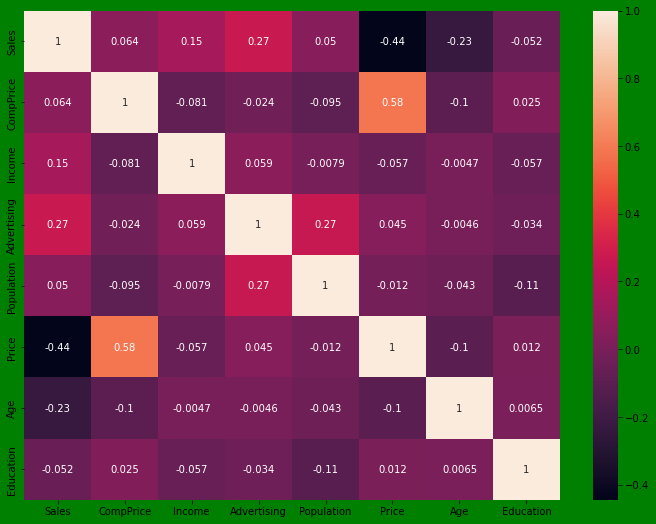

In [13]:
plt.figure(figsize=(12,9),facecolor='green')
sns.heatmap(corr,annot=True)

# Crreating New Columns "sales" & Dividing sales Amount columns on the basis of [0,5,10,100] for Bad, Medium, Good.

In [14]:
df["sales"] = pd.cut(df["Sales"],bins=[0,5,10,100],labels=["Bad","Medium","Good"])

In [15]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Good
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Good
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Bad


# Plotting Pairplot

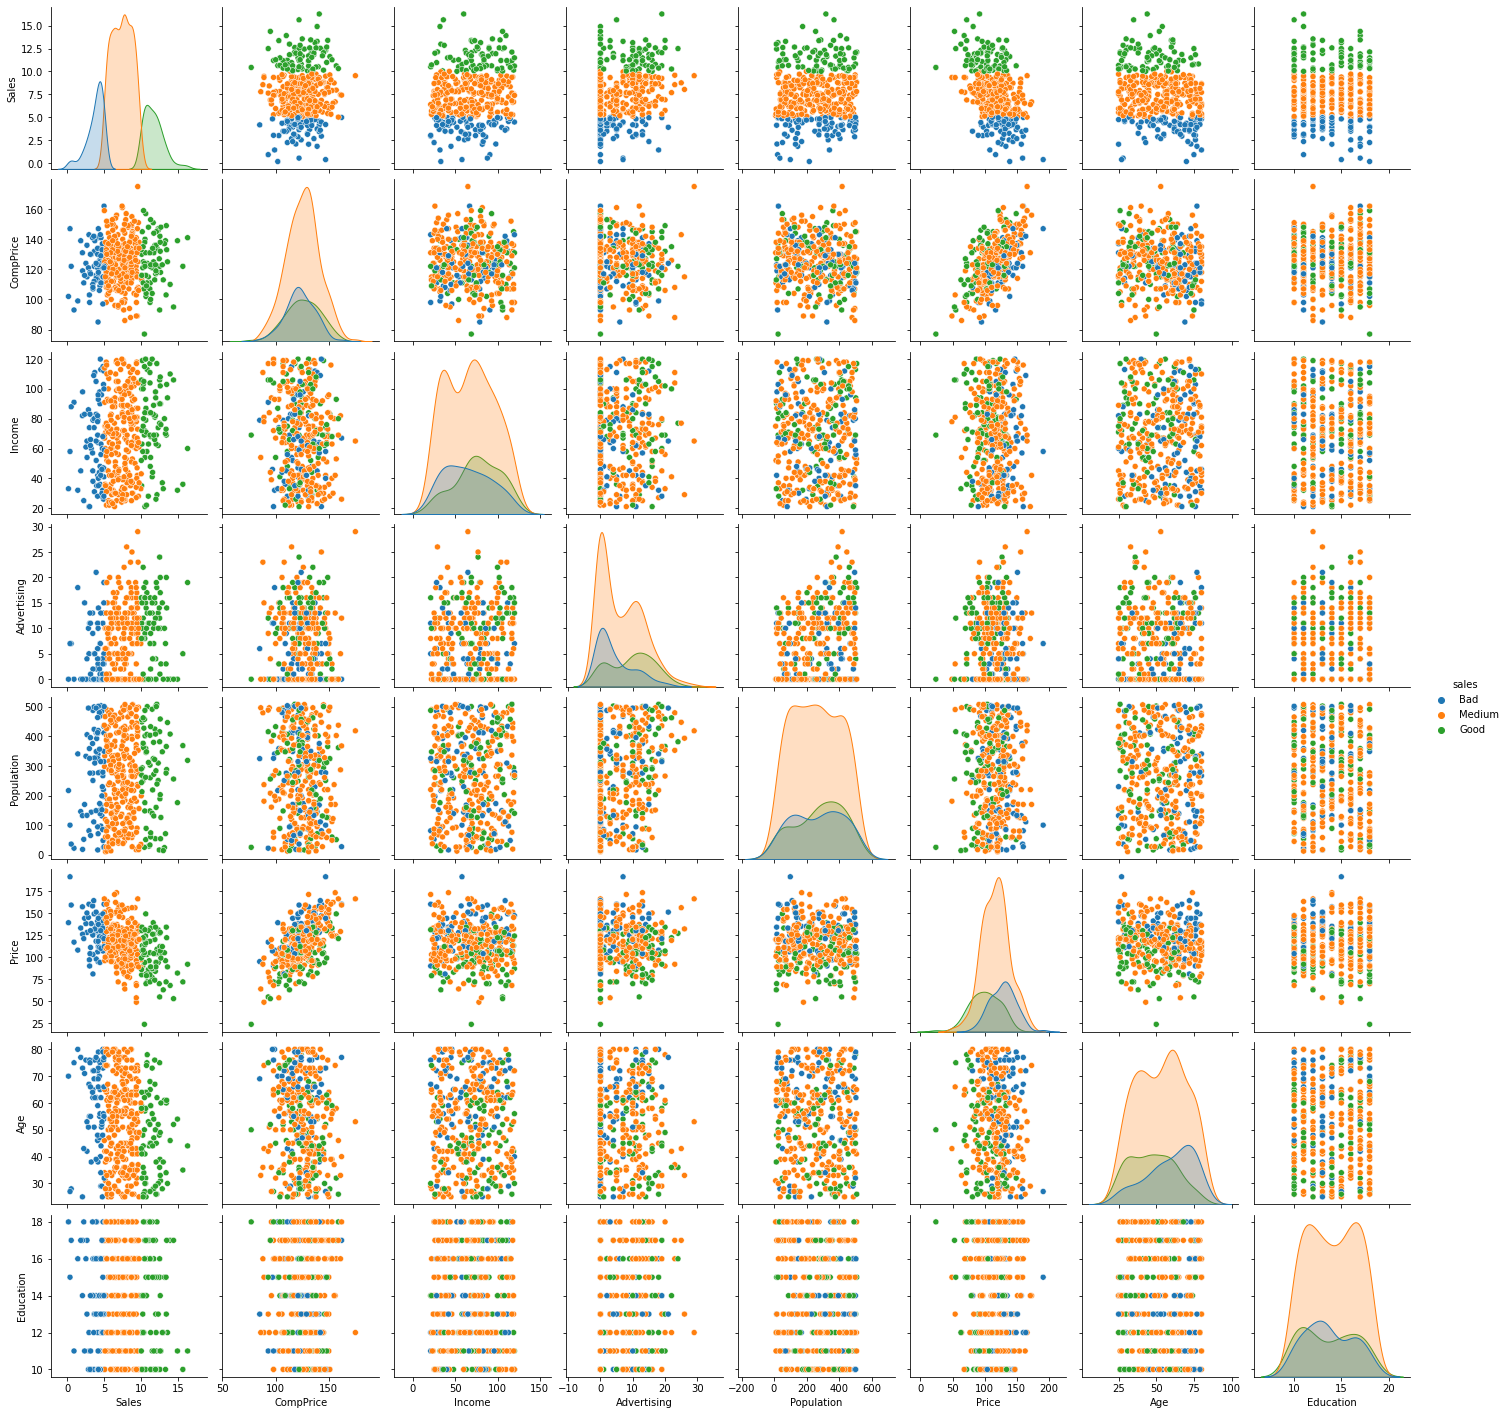

In [16]:
sns.pairplot(data=df, hue = 'sales')
plt.show()

In [18]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Good
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Good
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,Good
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Medium
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Medium
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Medium


# Creating Numerical dummy variables

In [19]:
df=pd.get_dummies(df,columns=['Urban','US'], drop_first=True)

In [20]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,sales,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,Medium,1,1
1,11.22,111,48,16,260,83,Good,65,10,Good,1,1
2,10.06,113,35,10,269,80,Medium,59,12,Good,1,1
3,7.40,117,100,4,466,97,Medium,55,14,Medium,1,1
4,4.15,141,64,3,340,128,Bad,38,13,Bad,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Good,1,1
396,6.14,139,23,3,37,120,Medium,55,11,Medium,0,1
397,7.41,162,26,12,368,159,Medium,40,18,Medium,1,1
398,5.94,100,79,7,284,95,Bad,50,12,Medium,1,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   sales        399 non-null    category
 10  Urban_Yes    400 non-null    uint8   
 11  US_Yes       400 non-null    uint8   
dtypes: category(1), float64(1), int64(7), object(1), uint8(2)
memory usage: 29.6+ KB


In [22]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [23]:
df['sales']=df['sales'].map({'Good':1,'Medium':2,'Bad':3})

In [24]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,sales,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,2,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1,1
3,7.40,117,100,4,466,97,Medium,55,14,2,1,1
4,4.15,141,64,3,340,128,Bad,38,13,3,1,0


In [25]:
x=df.iloc[:,0:6]
y=df['sales']

In [26]:
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [27]:
y

0      2
1      1
2      1
3      2
4      3
      ..
395    1
396    2
397    2
398    2
399    2
Name: sales, Length: 400, dtype: category
Categories (3, int64): [3 < 2 < 1]

In [48]:
X=x.drop(labels=None,axis=[0,1],index=1,inplace=False)

In [50]:
Y=y.dropna()

In [51]:
df['sales'].unique()

[2, 1, 3, NaN]
Categories (3, int64): [3 < 2 < 1]

In [52]:
df.sales.value_counts()

2    245
1     78
3     76
Name: sales, dtype: int64

In [53]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'sales',
 'Urban_Yes',
 'US_Yes']

# Train Test Split

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.3, random_state=42)

# Model Bulding

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
model = DecisionTreeClassifier(criterion= 'entropy',max_depth= 4)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Plotting Decision tree with builded model

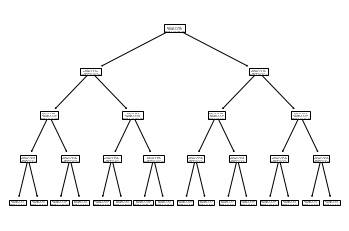

In [58]:
tree.plot_tree(model);

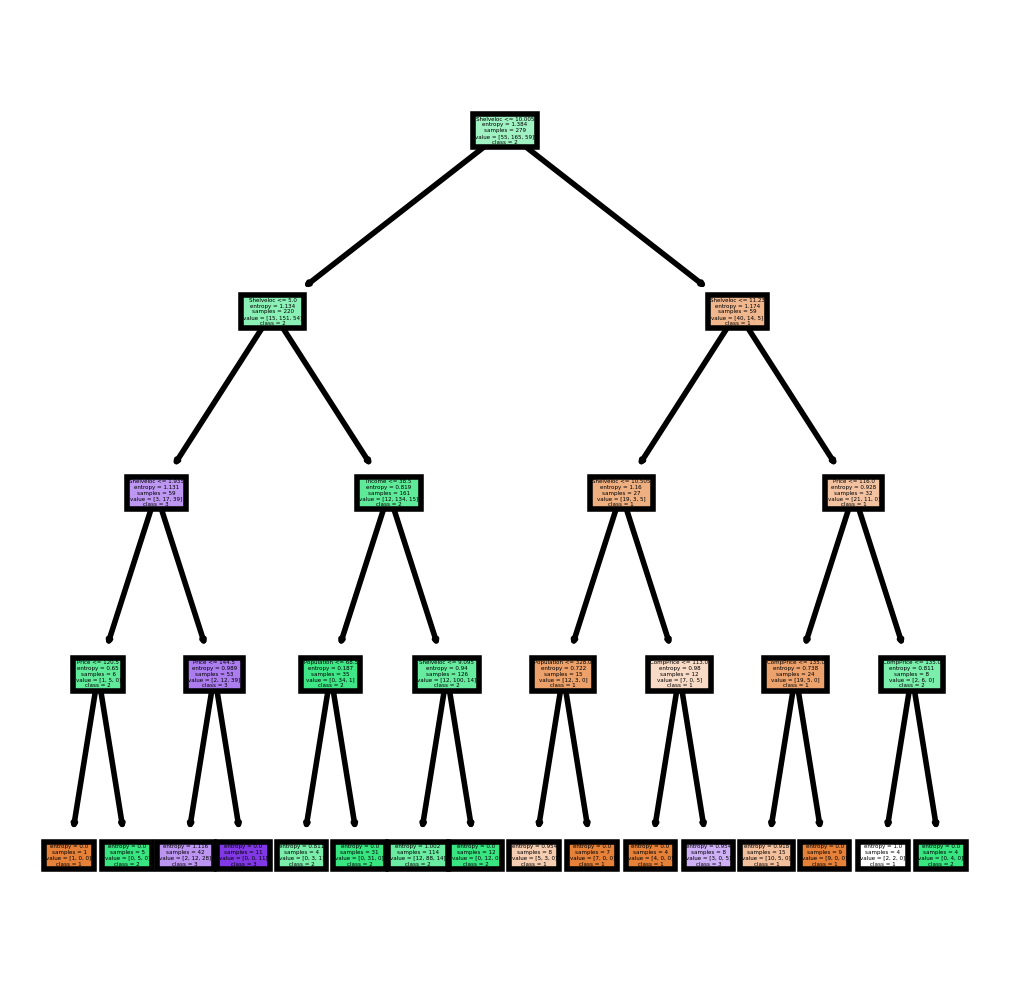

In [60]:
fn=['Shelveloc','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3', '4']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=400)
tree.plot_tree(model,
              feature_names=fn,
              class_names=cn,
              filled=True);

# Test Data

In [62]:
predict = model.predict(X_test)
pd.Series(predict).value_counts()

2    86
3    19
1    15
dtype: int64

In [65]:
pd.crosstab(Y_test,predict)

col_0,1,2,3
sales,,,
3,1,6,10
2,6,70,4
1,8,10,5


# Checking Accuracy from Predicted Model

In [67]:
np.mean(predict==Y_test)

0.7333333333333333

# Decision tree Regression

In [68]:
array = df.values
X = array[:,0:3]
Y =array[:,3]

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=1)

In [70]:
model = DecisionTreeRegressor()

In [71]:
model.fit(X_train, Y_train)

DecisionTreeRegressor()

# Accuracy Check for Model

In [72]:
model.score(X_test, Y_test)

-1.2884868119441308